Diabetes Prediction Project - Aahana Tiwari

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/sample_data/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

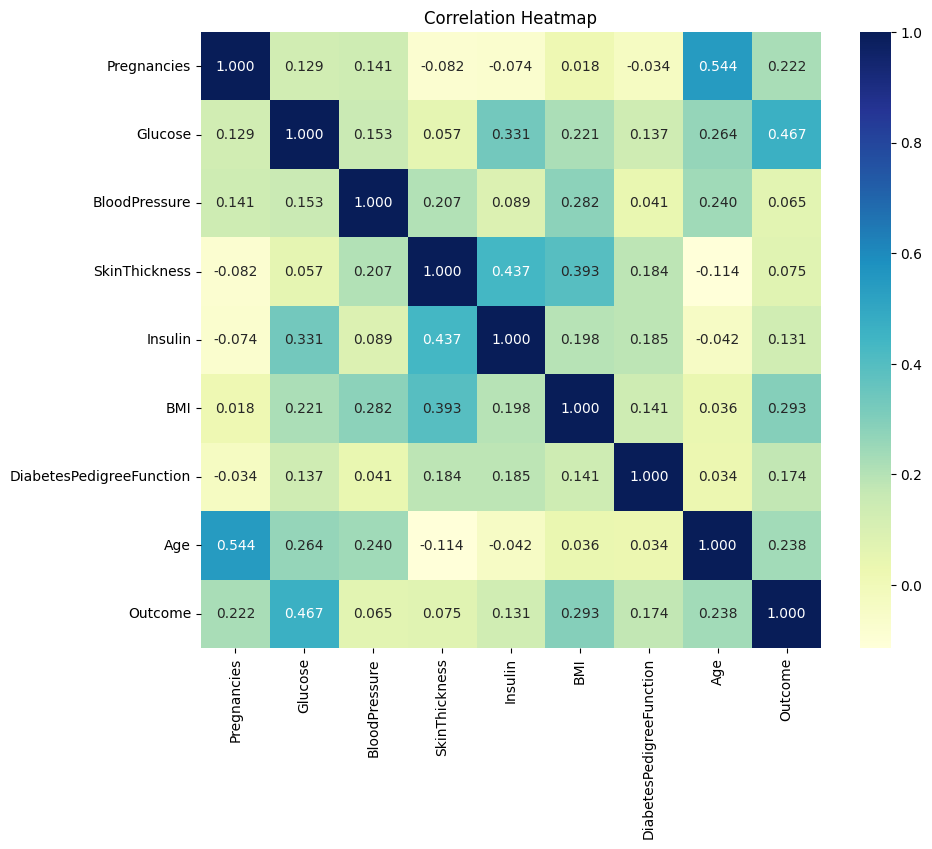

In [7]:
# Correlation plot of independent variables
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot=True, fmt = ".3f", cmap = "YlGnBu")
plt.title("Correlation Heatmap")

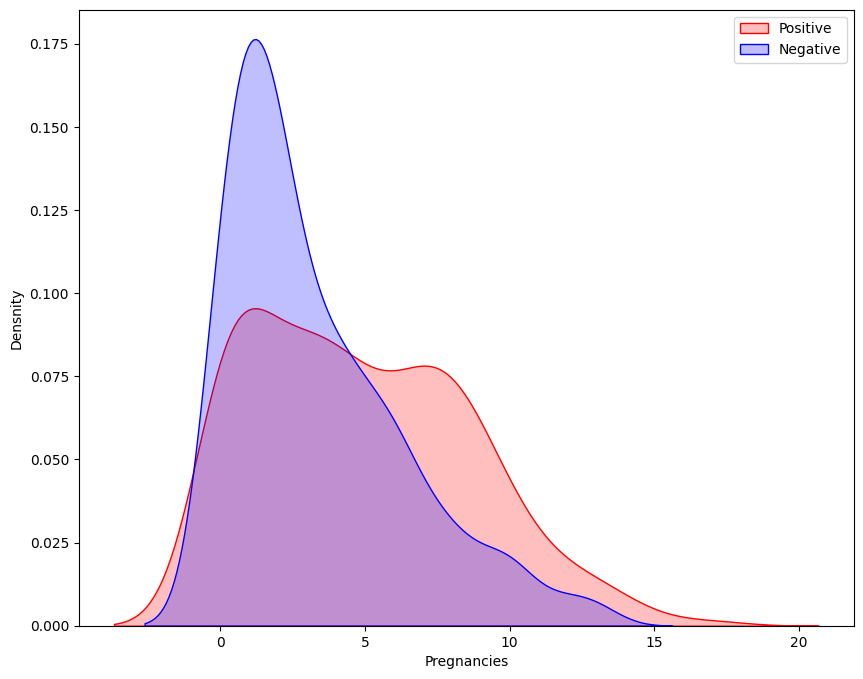

In [8]:
# Exporting pregnancy and target variables
plt.figure(figsize = (10,8))
# Plotting density function graph of the pregnancy and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Densnity")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

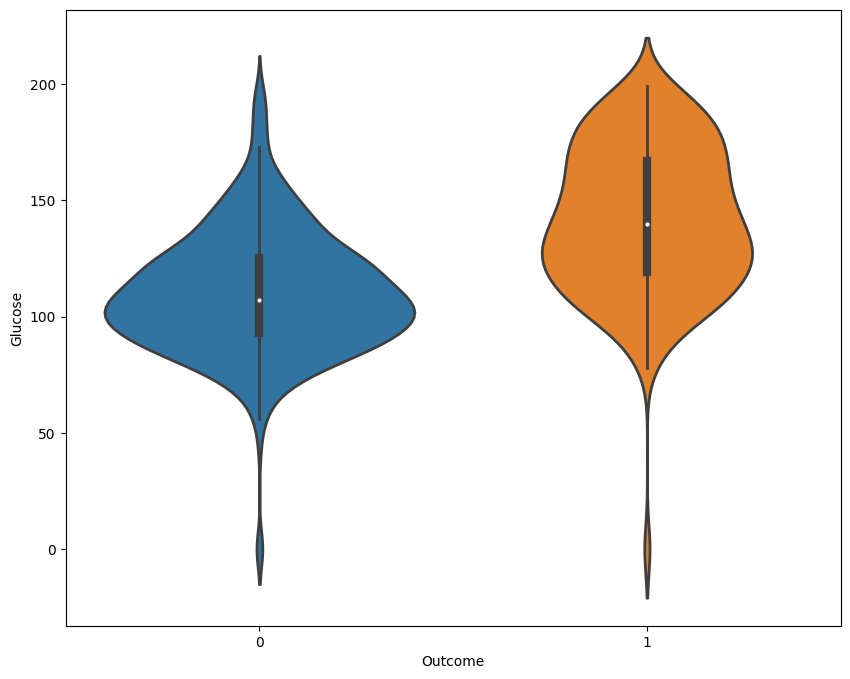

In [9]:
# Exploring glucose and target variables
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset, x="Outcome", y="Glucose", split=True, linewidth=2,ineer="quart")

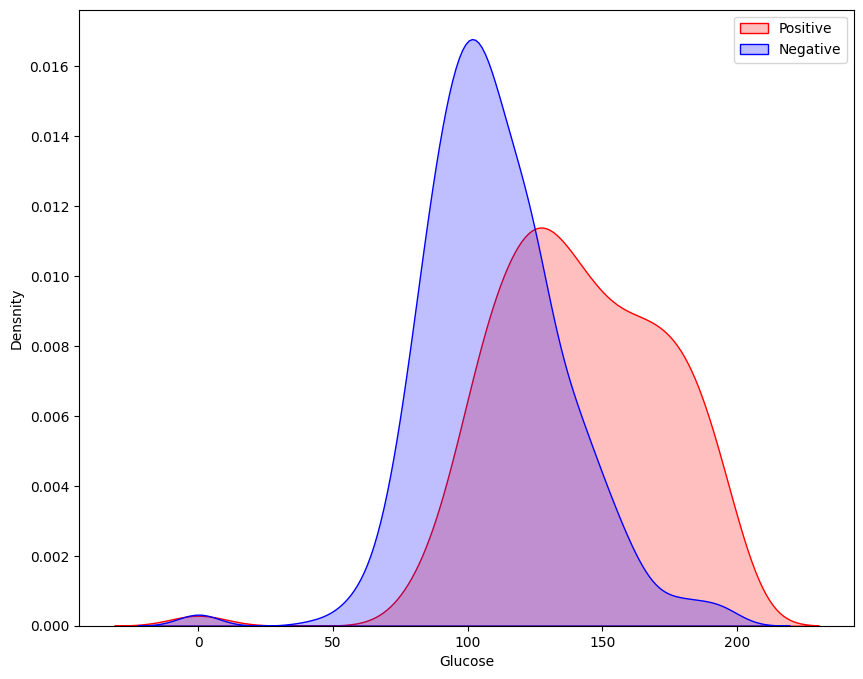

In [10]:
# Exporting glucose and target variables
plt.figure(figsize = (10,8))
# Plotting density function graph of the glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Densnity")
kde.legend(["Positive","Negative"])

In [11]:
# Replace 0 values with the mean/median of the respective features
dataset["Glucose"] = dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0,dataset["SkinThickness"].median())
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].median())
dataset["BMI"] = dataset["BMI"].replace(0,dataset["BMI"].median())

In [12]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [13]:
# Splitting the dependent and independent variables
X = dataset.drop(["Outcome"],axis=1)
y = dataset["Outcome"]

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,23,30.5,24.0,1.022,34
223,7,142,60,33,190.0,28.8,0.687,61
393,4,116,72,12,87.0,22.1,0.463,37
766,1,126,60,23,30.5,30.1,0.349,47
570,3,78,70,23,30.5,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,23,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,23,30.5,42.4,0.205,29


In [19]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [20]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train,y_train)
  # check accuracy score
  training_accuracy.append(knn.score(X_train,y_train))
  test_accuracy.append(knn.score(X_test,y_test))

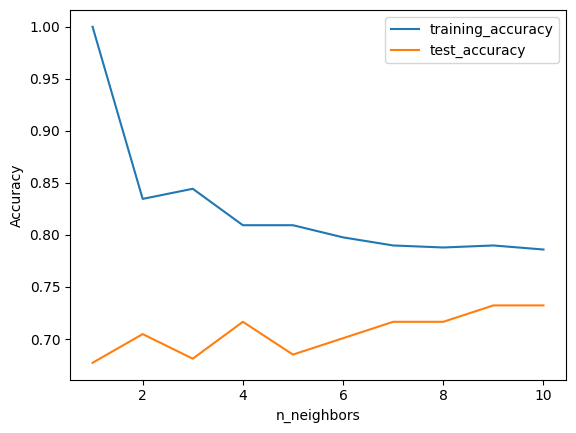

In [21]:
plt.plot(range(1,11), training_accuracy, label="training_accuracy")
plt.plot(range(1,11), test_accuracy, label="test_accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [22]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print("Training Accuracy : ", knn.score(X_train,y_train))
print("Test Accuracy : ", knn.score(X_test,y_test))

Training Accuracy :  0.7898832684824902
Test Accuracy :  0.7322834645669292


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
print("Training Accuracy : ", dt.score(X_train,y_train))
print("Test Accuracy : ", dt.score(X_test,y_test))

Training Accuracy :  1.0
Test Accuracy :  0.6929133858267716


Model is overfitting here, so we'll change some parameters.

Testing accuracy for different values of max_depth parameter.

In [24]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
  dt1 = DecisionTreeClassifier(random_state=0, max_depth=depth)
  dt1.fit(X_train,y_train)
  train_accuracy.append(dt1.score(X_train,y_train))
  test_accuracy.append(dt1.score(X_test,y_test))

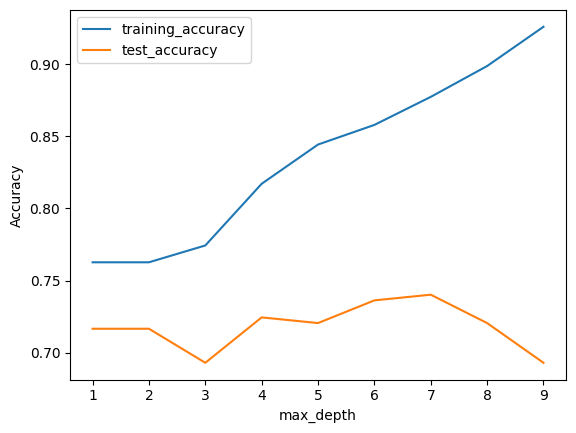

In [25]:
plt.plot(range(1,10), train_accuracy, label="training_accuracy")
plt.plot(range(1,10), test_accuracy, label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

max_depth = 6 has relatively high accuracy for both training and test datasets, with moderate difference between both accuracies.

In [26]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=6)
dt1.fit(X_train,y_train)
print("Training Accuracy : ", dt1.score(X_train,y_train))
print("Test Accuracy : ", dt1.score(X_test,y_test))

Training Accuracy :  0.857976653696498
Test Accuracy :  0.7362204724409449


In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Training Accuracy : ", mlp.score(X_train,y_train))
print("Test Accuracy : ", mlp.score(X_test,y_test))

Training Accuracy :  0.7645914396887159
Test Accuracy :  0.7047244094488189


Scaling Data:

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [29]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train,y_train)
print("Training Accuracy : ", mlp1.score(X_train,y_train))
print("Test Accuracy : ", mlp1.score(X_test,y_test))

Training Accuracy :  0.7762645914396887
Test Accuracy :  0.7244094488188977


In [30]:
X_train_scaled

array([[ 1.89917664, -0.23631971,  2.11027079, ..., -1.19085646,
         1.60661512,  0.06905859],
       [ 0.98286551,  0.64911358, -1.03516641, ..., -0.50059896,
         0.62609815,  2.37289284],
       [ 0.06655438, -0.20352588, -0.04187045, ..., -1.46408339,
        -0.02953111,  0.32504017],
       ...,
       [ 1.89917664, -0.69543326,  1.11697483, ...,  1.9153023 ,
         1.94028358,  0.41036736],
       [-1.1551938 ,  0.61631975, -0.04187045, ...,  1.45513063,
        -0.78467552, -0.35757739],
       [-1.1551938 ,  0.09161855,  1.94472146, ..., -1.40656193,
        -0.61784129, -1.04019494]])

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
y_predmlp = mlp1.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [33]:
cm = confusion_matrix(y_test, y_predmlp)
cm

array([[167,   1],
       [ 85,   1]])

<Axes: >

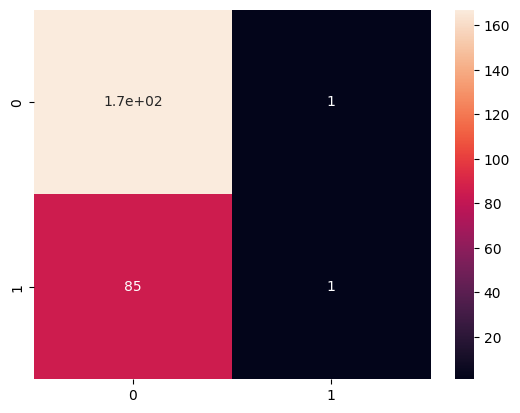

In [34]:
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test,y_predmlp))

              precision    recall  f1-score   support

           0       0.66      0.99      0.80       168
           1       0.50      0.01      0.02        86

    accuracy                           0.66       254
   macro avg       0.58      0.50      0.41       254
weighted avg       0.61      0.66      0.53       254



In [36]:
print(accuracy_score(y_test,y_predmlp))

0.6614173228346457
